In [103]:
import random
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
from scipy import stats
from scipy.stats import binom, poisson, norm ,gamma           # Functions from SciPy Stats...
# import scipy.optimize as optimization
from scipy import optimize
from numpy.linalg import inv
from functools import partial
from fitter import Fitter
from astropy.modeling import models, fitting

In [104]:
sys.path.append('D:\my github\Siyi Applied Stats\Documents for JN\AppStat2021-main\External_Functions\\')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

plt.rcParams['font.size'] = 18     # Set some basic plotting parameters

In [105]:
# problem 1.1.2
a18 = 480700*((7/15)**18)*(8/15)**7
a19 = 177100*((7/15)**19)*(8/15)**6
a20 = 53130*((7/15)**20)*(8/15)**5
a21 = 12650*((7/15)**21)*(8/15)**4
a22 = 2300*((7/15)**22)*(8/15)**3
a23 = 300*((7/15)**23)*(8/15)**2
a24 = 25*((7/15)**24)*(8/15)**1
a25 = 1*((7/15)**25)*(8/15)**0
print(a18+a19+a20+a21+a22+a23+a24+a25)

0.009282075671551133


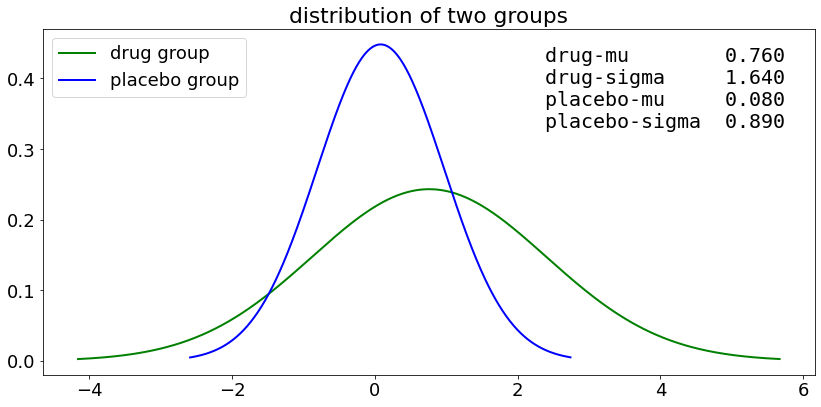

In [137]:
# problem 2.2.2
def normpdf(x,mu,sigma):       
    pdf=np.exp(-(x-mu)**2/(2*sigma**2))/(sigma * np.sqrt(2 * np.pi))
    return pdf

mu1,sigma1=0.76,1.64 # drug group
x1= np.arange(mu1-3*sigma1,mu1+3*sigma1,0.01) 
y1=normpdf(x1,mu1,sigma1)

mu2,sigma2=0.08,0.89 # placebo group
x2= np.arange(mu2-3*sigma2,mu2+3*sigma2,0.01)
y2=normpdf(x2,mu2,sigma2)

fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(x1,y1, '-g', linewidth=2, label='drug group')   
ax.plot(x2,y2, '-b', linewidth=2, label='placebo group') 
plt.title('distribution of two groups')

d = {
    'drug-mu': 0.76 ,
    'drug-sigma':1.64,
    'placebo-mu': 0.08 ,
    'placebo-sigma':0.89,

    }
    

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.65, 0.95, text, ax, fontsize=20)

ax.legend(loc='upper left', fontsize=18); 

fig.tight_layout()
plt.savefig('fig3',dpi=600)

plt.show()

In [136]:
# problem 2.2.2
def solve(m1,m2,std1,std2):
    a = 1/(2*std1**2) - 1/(2*std2**2)
    b = m2/(std2**2) - m1/(std1**2)
    c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
    return np.roots([a,b,c])

m1 = 0.76
std1 = 1.64
m2 = 0.08
std2 = 0.89

result = solve(m1,m2,std1,std2)
print(result)

[-1.48687784  1.07915399]
